# Word2Vec(skip gram)

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1

In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
samples = ["철수은 축구를 좋아한다",
          "영희은 축구를 싫어한다",
          "철수은 도서관을 좋아한다",
          "영희은 도서관을 싫어한다",
          "철수은 공부를 좋아한다",
          "영희은 공부를 싫어한다",
          "철수은 축구를 좋아한다 영희은 축구를 싫어한다"]

In [3]:
from tensorflow.keras import preprocessing

tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples) 
sequences = tokenizer.texts_to_sequences(samples) 

word_to_index = tokenizer.word_index
word_to_index['<PAD>'] = 0

In [4]:
index_to_word = dict((i, w) for w, i in word_to_index.items())
print(index_to_word)

{1: '철수은', 2: '축구를', 3: '좋아한다', 4: '영희은', 5: '싫어한다', 6: '도서관을', 7: '공부를', 0: '<PAD>'}


In [5]:
skip_gram_data = []
print(f'sequences: {sequences}')

for sequence in sequences:
    for i in range(1, len(sequence) - 1):
        context = sequence[i]
        target = sequence[i - 1]
        skip_gram_data.append([target, context])
        target = sequence[i+1]
        skip_gram_data.append([target, context])
        
print(f'skip_gram_data\n{skip_gram_data}')

sequences: [[1, 2, 3], [4, 2, 5], [1, 6, 3], [4, 6, 5], [1, 7, 3], [4, 7, 5], [1, 2, 3, 4, 2, 5]]
skip_gram_data
[[1, 2], [3, 2], [4, 2], [5, 2], [1, 6], [3, 6], [4, 6], [5, 6], [1, 7], [3, 7], [4, 7], [5, 7], [1, 2], [3, 2], [2, 3], [4, 3], [3, 4], [2, 4], [4, 2], [5, 2]]


In [7]:
context = []
target = []
for i in range(len(skip_gram_data)):
    context.append(skip_gram_data[i][0])  # context
    target.append(skip_gram_data[i][1])  # label

In [8]:
num_epochs = 1000
batch_size = 3

In [38]:
dataset = tf.data.Dataset.from_tensor_slices((context, target))
dataset = dataset.batch(batch_size)

In [39]:
vocab_size = len(word_to_index)
emb_size = 128

In [40]:
from tensorflow.keras import layers

In [41]:
class SkipGramModel(tf.keras.Model):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipGramModel, self).__init__(name='skip_gram')
        self.vocab_size = vocab_size
        self.w_1 = tf.Variable(tf.random.uniform([vocab_size, emb_size], -1.0, 1.0))
        self.w_2 = tf.Variable(tf.random.uniform([emb_size, vocab_size], -1.0, 1.0))
    
    def call(self, inputs):
        one_hot_inputs = tf.one_hot(indices=inputs, depth=self.vocab_size)
        one_hot_inputs = tf.squeeze(one_hot_inputs, axis=1)
        
        hidden = tf.matmul(one_hot_inputs, self.w_1)
        
        return tf.matmul(hidden, self.w_2)

In [42]:
model = SkipGramModel(vocab_size = vocab_size, emb_size=emb_size)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy', #not categorical_crossentropy
              metrics=['accuracy'])

In [43]:
model.fit(dataset, epochs=num_epochs, shuffle=True)

Epoch 1/1000
7/7 [==============================] - 0s 32ms/step - loss: 6.3093 - accuracy: 0.2000
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8355 - accuracy: 0.2000
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 6.8287 - accuracy: 0.2000
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 6.8268 - accuracy: 0.2000
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8266 - accuracy: 0.2000
Epoch 8/1000
7/7 [==============================] - 0s 3ms/step - loss: 6.8266 - accuracy: 0.2000
Epoch 9/1000
7/7 [==============================] - 0s 3ms/step - loss: 6.8266 - accuracy: 0.2000
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 6.8266 - accuracy: 0.2000
Epoch 11/1000
7/7 

7/7 [==============================] - 0s 2ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 84/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 85/1000
7/7 [==============================] - 0s 3ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 86/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 87/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 88/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 89/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 90/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 91/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 92/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8267 - accuracy: 0.2000
Epoch 93/1000
7/7 [=====

7/7 [==============================] - 0s 3ms/step - loss: 6.8268 - accuracy: 0.2000
Epoch 166/1000
7/7 [==============================] - 0s 3ms/step - loss: 6.8268 - accuracy: 0.2000
Epoch 167/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8268 - accuracy: 0.2000
Epoch 168/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8268 - accuracy: 0.2000
Epoch 169/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8269 - accuracy: 0.2000
Epoch 170/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8269 - accuracy: 0.2000
Epoch 171/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8269 - accuracy: 0.2000
Epoch 172/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8269 - accuracy: 0.2000
Epoch 173/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8269 - accuracy: 0.2000
Epoch 174/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8269 - accuracy: 0.2000
Epoch 175/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 248/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 249/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 250/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 251/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 252/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 253/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 254/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 255/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 256/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8270 - accuracy: 0.2000
Epoch 257/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 330/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 331/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 332/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 333/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 334/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 335/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 336/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 337/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 338/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8272 - accuracy: 0.2000
Epoch 339/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 412/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 413/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 414/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 415/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 416/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 417/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 418/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 419/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 420/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8274 - accuracy: 0.2000
Epoch 421/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8275 - accuracy: 0.2000
Epoch 494/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8275 - accuracy: 0.2000
Epoch 495/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8275 - accuracy: 0.2000
Epoch 496/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8275 - accuracy: 0.2000
Epoch 497/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8276 - accuracy: 0.2000
Epoch 498/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8276 - accuracy: 0.2000
Epoch 499/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8276 - accuracy: 0.2000
Epoch 500/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8276 - accuracy: 0.2000
Epoch 501/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8276 - accuracy: 0.2000
Epoch 502/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8276 - accuracy: 0.2000
Epoch 503/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 576/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 577/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 578/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 579/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 580/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 581/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 582/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 583/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 584/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 585/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 658/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 659/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 660/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 661/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 662/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 663/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 664/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 665/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 666/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8277 - accuracy: 0.2000
Epoch 667/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 740/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 741/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 742/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 743/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 744/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 745/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 746/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 747/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 748/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 749/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 822/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 823/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 824/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 825/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 826/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 827/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 828/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 829/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 830/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 831/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 904/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 905/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 906/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 907/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 908/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 909/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 910/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 911/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 912/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8278 - accuracy: 0.2000
Epoch 913/1000


7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 986/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 987/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 988/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 989/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 990/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 991/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 992/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 993/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 994/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8279 - accuracy: 0.2000
Epoch 995/1000


In [47]:
embedding_matrix = model.w_1.numpy() 

In [48]:
embedding_matrix.shape

(8, 128)

In [49]:
embedding_matrix

array([[ 0.7428534 ,  0.02465677,  0.06498647, ..., -0.68475485,
         0.32238078, -0.88402605],
       [ 0.2574873 , -0.09482481, -0.98578995, ..., -0.8675009 ,
         0.31853768,  0.4324917 ],
       [-0.14428902, -0.5408716 , -0.68564534, ...,  0.6468103 ,
         0.15963721, -0.6974499 ],
       ...,
       [-0.27193236, -0.44955158, -0.6591542 , ...,  0.17304325,
         0.9664352 , -0.77605104],
       [ 0.5283134 , -0.67013526,  0.16610861, ...,  0.07949591,
        -0.3782456 , -0.4652536 ],
       [ 0.80115104, -0.45773435,  0.40145302, ...,  0.72052264,
        -0.71760964,  0.12197733]], dtype=float32)

### 임베딩 그림 그리기

In [18]:
%matplotlib inline  

import matplotlib.pyplot as plt  

In [19]:
from sklearn.manifold import TSNE

In [21]:
import matplotlib.font_manager as fm  

In [22]:
font_path = '/content/gdrive/My Drive/asset/font/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

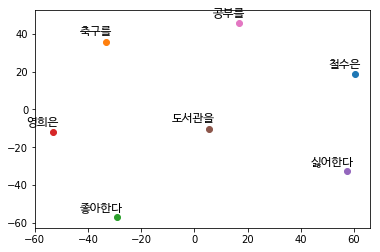

In [23]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(embdding_matrix)

xs = transformed[:,0]
ys = transformed[:,1]

for i, offset in enumerate(transformed[1:]):
    x, y = offset
    plt.scatter(x, y)
    plt.annotate(index_to_word[i+1], xy=(x, y), xytext=(6, 4),
                 textcoords='offset points', ha='right', va='bottom', fontproperties=fontprop)

plt.show()